In [1]:
# load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from prettytable import PrettyTable
plt.style.use('ggplot')

In [2]:
# load the datasets
tv_spot_data = pd.read_csv('tv_spot_data.csv',sep=",")

# looking through the dataset
tv_spot_data.head()
tv_spot_data.set_index('row')

,channel,visits,cost,contacts,date_time,spot
row,,,,,,
0,A,291.90,322.5,1000.000000,2018-12-23 00:34:00,4189_OneItemPieceOfPaper_25_Abba
1,B,-454.65,107.5,9000.000000,2018-12-23 00:57:00,3859_Winter-Time_25_Beta
2,C,148.05,432.5,11000.000000,2018-12-23 01:09:00,4025_Tram_60_FPV
3,D,903.00,2375.0,24666.666667,2018-12-23 01:15:00,3976_At-least-a-week_90_FPV
4,C,260.40,2.5,41666.666667,2018-12-23 01:36:00,3964_TheView_25_FPV
...,...,...,...,...,...,...
5489,E,-54.60,815.0,67333.333333,2019-05-22 23:05:00,4379_Toxic-Vanilla-Milkshake_25_FPV
5490,Q,122.85,245.0,0.000000,2019-05-22 23:11:00,4603_Lone-Wulf_25_hotel
5491,S,543.90,3482.5,211666.666667,2019-05-22 23:27:00,4379_Toxic-Vanilla-Milkshake_25_FPV


In [3]:

# the number of contacts is decimal and has six digits after the decimal so that the unit of contacts is per million.

# Two problems have been found:
# 1. It is abnormal that the value of visits is negative
# 2. It is weird that the number of visits is positive, whilst the number of contacts is equal to zero. In other words, people did not see the spots when they visit Trivago website.
# To attempt to reveal reasons which cause this problem

tv_spot_data['visits_check'] = tv_spot_data['visits'].apply(lambda x: 'true'
                                                            if x >= 0 else 'false')
v_c = tv_spot_data.loc[tv_spot_data['visits_check']=='false']
v_c.sort_values(by=['spot'])
v_c


,row,channel,visits,cost,contacts,date_time,spot,visits_check
1,1,B,-454.65,107.5,9000.000000,2018-12-23 00:57:00,3859_Winter-Time_25_Beta,false
6,6,E,-166.95,0.0,17000.000000,2018-12-23 03:14:00,3859_Winter-Time_25_Beta,false
9,9,B,-46.20,215.0,4666.666667,2018-12-23 03:47:00,3836_TheView_90_FPV,false
15,15,C,-39.90,1727.5,127000.000000,2018-12-23 06:19:00,3859_Winter-Time_25_Beta,false
16,16,C,-3.15,1080.0,86666.666667,2018-12-23 06:30:00,3859_Winter-Time_25_Beta,false
...,...,...,...,...,...,...,...,...
5472,5472,L,-11.55,707.5,13666.666667,2019-05-22 17:41:00,4588_Towel-of-Wisdom_90_FPV,false
5473,5473,N,-217.35,2502.5,90333.333333,2019-05-22 18:22:00,4378_Random-Request_25_FPV,false
5480,5480,C,-91.35,545.0,18666.666667,2019-05-22 21:10:00,3962_Pangalactic-Gargleblaster_90_FPV,false
5481,5481,F,-57.75,1740.0,39333.333333,2019-05-22 21:23:00,4377_Pangalactic-Gargleblaster_25_FPV,false


In [4]:
# Regarding the first problem, I cannot find any reasonable explanation
# The negative visits distribute in a variety of spots over time.
# I only can assume that there is a glitch through data transition. 
# During the data transition, the number of visits somehow became negative.
# So I manually correct the number of visits

tv_spot_data['visits_correct'] = tv_spot_data['visits'].apply(lambda x: abs(x))


In [5]:
# In terms of the second problem, this is not any reasonable interpretation, either
# So, I have to remove the row, in which the number of contacts is zero.

tv_spot_data.drop(tv_spot_data[tv_spot_data['contacts']==0].index,inplace=True)
tv_spot_data.shape


(5260, 9)

In [30]:
# The distribution of numerical columns
tv_spot_data.describe()

,row,visits,cost,contacts,visits_correct
count,5260.000000,5260.000000,5260.000000,5.260000e+03,5260.000000
mean,2734.106274,237.105570,2908.924430,1.062033e+05,314.031046
std,1584.018700,711.024284,12193.581555,1.997175e+05,680.552000
min,0.000000,-824.250000,0.000000,3.333333e+02,0.000000
25%,1365.750000,-22.050000,262.500000,1.600000e+04,80.850000
50%,2724.000000,132.300000,870.000000,4.966667e+04,177.450000
75%,4109.250000,323.400000,2730.000000,1.196667e+05,344.400000
max,5493.000000,22974.000000,283842.500000,3.024333e+06,22974.000000


In [31]:
#check the structure
tv_spot_data.info()

#Based on the information, the quality of data is good. 
#In other words, there is no empty cell (NA) in the dataset#

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5260 entries, 0 to 5493
Data columns (total 9 columns):
row               5260 non-null int64
channel           5260 non-null object
visits            5260 non-null float64
cost              5260 non-null float64
contacts          5260 non-null float64
date_time         5260 non-null object
spot              5260 non-null object
visits_check      5260 non-null object
visits_correct    5260 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 410.9+ KB


In [32]:
# to convert column, date_time, into timestamp and to create new columns including weekday, month and hour
tv_spot_data['date_time'] = pd.to_datetime(tv_spot_data['date_time'], 
                                           format='%Y-%m-%d %H:%M:%S', errors='ignore')


tv_spot_data['weekday'] = tv_spot_data['date_time'].dt.day_name()
tv_spot_data['month'] = tv_spot_data['date_time'].dt.month_name()
tv_spot_data['time'] = tv_spot_data['date_time'].dt.time
tv_spot_data['hour'] = tv_spot_data['date_time'].dt.hour

tv_spot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5260 entries, 0 to 5493
Data columns (total 13 columns):
row               5260 non-null int64
channel           5260 non-null object
visits            5260 non-null float64
cost              5260 non-null float64
contacts          5260 non-null float64
date_time         5260 non-null datetime64[ns]
spot              5260 non-null object
visits_check      5260 non-null object
visits_correct    5260 non-null float64
weekday           5260 non-null object
month             5260 non-null object
time              5260 non-null object
hour              5260 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 575.3+ KB


In [33]:
tv_spot_data.head()

,row,channel,visits,cost,contacts,date_time,spot,visits_check,visits_correct,weekday,month,time,hour
0,0,A,291.90,322.5,1000.000000,2018-12-23 00:34:00,4189_OneItemPieceOfPaper_25_Abba,true,291.90,Sunday,December,00:34:00,0
1,1,B,-454.65,107.5,9000.000000,2018-12-23 00:57:00,3859_Winter-Time_25_Beta,false,454.65,Sunday,December,00:57:00,0
2,2,C,148.05,432.5,11000.000000,2018-12-23 01:09:00,4025_Tram_60_FPV,true,148.05,Sunday,December,01:09:00,1
3,3,D,903.00,2375.0,24666.666667,2018-12-23 01:15:00,3976_At-least-a-week_90_FPV,true,903.00,Sunday,December,01:15:00,1
4,4,C,260.40,2.5,41666.666667,2018-12-23 01:36:00,3964_TheView_25_FPV,true,260.40,Sunday,December,01:36:00,1


In [34]:
# split the column, spot, into 4 different columns including spot_id, spot_name, spot_length, and spot_campaign 

new = tv_spot_data["spot"].str.split("_", n = 4, expand = True) 
tv_spot_data["spot_id"]= new[0] 
tv_spot_data["spot_name"]=new[1]
tv_spot_data["spot_length"]=new[2]
tv_spot_data["spot_campaign"]=new[3]
tv_spot_data["spot_length"] = tv_spot_data['spot_length'].astype(int)
tv_spot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5260 entries, 0 to 5493
Data columns (total 17 columns):
row               5260 non-null int64
channel           5260 non-null object
visits            5260 non-null float64
cost              5260 non-null float64
contacts          5260 non-null float64
date_time         5260 non-null datetime64[ns]
spot              5260 non-null object
visits_check      5260 non-null object
visits_correct    5260 non-null float64
weekday           5260 non-null object
month             5260 non-null object
time              5260 non-null object
hour              5260 non-null int64
spot_id           5260 non-null object
spot_name         5260 non-null object
spot_length       5260 non-null int64
spot_campaign     5260 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(9)
memory usage: 739.7+ KB


In [35]:
# To check the categorical columns

tv_spot_data["weekday"].describe()


count        5260
unique          7
top       Tuesday
freq          807
Name: weekday, dtype: object

In [36]:
tv_spot_data["spot_name"].describe()

count                          5260
unique                           20
top       Pangalactic-Gargleblaster
freq                           1118
Name: spot_name, dtype: object

In [37]:
tv_spot_data["spot_campaign"].describe()

count     5260
unique       4
top        FPV
freq      3606
Name: spot_campaign, dtype: object

In [38]:
tv_spot_data["spot_length"] = tv_spot_data['spot_length'].astype(str)
tv_spot_data["spot_length"].describe()

count     5260
unique       3
top         25
freq      3138
Name: spot_length, dtype: object

In [39]:
tv_spot_data["channel"].describe()

count     5260
unique      18
top          C
freq      1287
Name: channel, dtype: object

In [40]:
tv_spot_data["month"].describe()

count      5260
unique        6
top       April
freq       1502
Name: month, dtype: object

In [41]:
# To check the dimention
tv_spot_data.shape

(5260, 17)

In [42]:
# Task 2
# Calulating metrics
# Visits per million contacts
tv_spot_data['VPMC'] = tv_spot_data['visits_correct']/tv_spot_data['contacts']

# Costs per visit CPV
tv_spot_data['CPV'] = tv_spot_data['cost']/tv_spot_data['visits_correct']

tv_spot_data.info()
tv_spot_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5260 entries, 0 to 5493
Data columns (total 19 columns):
row               5260 non-null int64
channel           5260 non-null object
visits            5260 non-null float64
cost              5260 non-null float64
contacts          5260 non-null float64
date_time         5260 non-null datetime64[ns]
spot              5260 non-null object
visits_check      5260 non-null object
visits_correct    5260 non-null float64
weekday           5260 non-null object
month             5260 non-null object
time              5260 non-null object
hour              5260 non-null int64
spot_id           5260 non-null object
spot_name         5260 non-null object
spot_length       5260 non-null object
spot_campaign     5260 non-null object
VPMC              5260 non-null float64
CPV               5259 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(10)
memory usage: 821.9+ KB


,row,visits,cost,contacts,visits_correct,hour,VPMC,CPV
count,5260.000000,5260.000000,5260.000000,5.260000e+03,5260.000000,5260.000000,5260.000000,5259.000000
mean,2734.106274,237.105570,2908.924430,1.062033e+05,314.031046,11.571863,0.013682,inf
std,1584.018700,711.024284,12193.581555,1.997175e+05,680.552000,6.825701,0.047851,NaN
min,0.000000,-824.250000,0.000000,3.333333e+02,0.000000,0.000000,0.000000,0.000000
25%,1365.750000,-22.050000,262.500000,1.600000e+04,80.850000,6.000000,0.001395,1.675485
50%,2724.000000,132.300000,870.000000,4.966667e+04,177.450000,12.000000,0.003442,5.350673
75%,4109.250000,323.400000,2730.000000,1.196667e+05,344.400000,17.000000,0.009667,14.308218
max,5493.000000,22974.000000,283842.500000,3.024333e+06,22974.000000,23.000000,1.489950,inf


In [43]:
# I have found that in terms of cost per visit (CPV), there are outliers and will dig deeply

tv_spot_data['CPV_check'] = tv_spot_data['visits'].apply(lambda 
                                                         x: 'true' if x == 0 else 'false')
CPV_c = tv_spot_data.loc[tv_spot_data['CPV_check']=='true']
CPV_c.sort_values(by=['CPV'])
CPV_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 352 to 5116
Data columns (total 20 columns):
row               11 non-null int64
channel           11 non-null object
visits            11 non-null float64
cost              11 non-null float64
contacts          11 non-null float64
date_time         11 non-null datetime64[ns]
spot              11 non-null object
visits_check      11 non-null object
visits_correct    11 non-null float64
weekday           11 non-null object
month             11 non-null object
time              11 non-null object
hour              11 non-null int64
spot_id           11 non-null object
spot_name         11 non-null object
spot_length       11 non-null object
spot_campaign     11 non-null object
VPMC              11 non-null float64
CPV               10 non-null float64
CPV_check         11 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), object(11)
memory usage: 1.8+ KB


In [44]:
# There are 11 outliers in terms of cost per visit (CPV)
# 10 out of the 11 outliers results from the number of visits is zero, 
# And one outlier is the result of that both the number of visits and the number of costs are equal to zero.
# I will build up a new dataset, CPV_clear, in which the outliers have been removed.
# The new dataset, CPV_clear, primarily focuses on the research regarding CPV.
# I continue to apply the dataset, tv_spot_data when I study the visit per million contacts.

CPV_clear = tv_spot_data.loc[tv_spot_data['CPV_check']=='false']
CPV_clear.sort_values(['CPV'])
CPV_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5249 entries, 0 to 5493
Data columns (total 20 columns):
row               5249 non-null int64
channel           5249 non-null object
visits            5249 non-null float64
cost              5249 non-null float64
contacts          5249 non-null float64
date_time         5249 non-null datetime64[ns]
spot              5249 non-null object
visits_check      5249 non-null object
visits_correct    5249 non-null float64
weekday           5249 non-null object
month             5249 non-null object
time              5249 non-null object
hour              5249 non-null int64
spot_id           5249 non-null object
spot_name         5249 non-null object
spot_length       5249 non-null object
spot_campaign     5249 non-null object
VPMC              5249 non-null float64
CPV               5249 non-null float64
CPV_check         5249 non-null object
dtypes: datetime64[ns](1), float64(6), int64(2), object(11)
memory usage: 861.2+ KB


In [45]:
#Task 3 Section 1
# Which campaigns were aired most regarding the number of airings, cost and contacts
# Which name were aired most regarding the number of airings, cost and contacts
# Which length were aired most regarding the number of airings, cost and contacts

def count(x):
    z = tv_spot_data.groupby(x).count()
    e = z.max(axis = 1)
    m = e.idxmax (axis = 1)
    return (m)

def group(x,y):
    m = tv_spot_data.groupby(x)[y].sum().sort_values(ascending=False)
    z = m.idxmax(axis = 1)
    return(z)

a = count('spot_campaign')
b = group('spot_campaign', 'cost')
c = group('spot_campaign', 'contacts')
d = count('spot_name')
e = group('spot_name', 'cost') 
f = group('spot_name', 'contacts')
g = count('spot_length')
h = group('spot_length','cost')
i = group('spot_length','contacts')


x = PrettyTable()
x.field_names = ["Types","The number of airing", "Cost", "Contacts"]
x.add_row(["Campaign", a, b, c])
x.add_row(["Name", d, e, f])
x.add_row(["Length", g, h, i])
print(x)

+----------+---------------------------+---------------------------+---------------------------+
|  Types   |    The number of airing   |            Cost           |          Contacts         |
+----------+---------------------------+---------------------------+---------------------------+
| Campaign |            FPV            |            FPV            |            FPV            |
|   Name   | Pangalactic-Gargleblaster | Pangalactic-Gargleblaster | Pangalactic-Gargleblaster |
|  Length  |             25            |             90            |             25            |
+----------+---------------------------+---------------------------+---------------------------+


In [46]:
# Task 3 Section 2

# Which were the spots aired - channel, month, weekday, the time of day?
# Def functions, whereby charts would be drawn, equips me to analyze the data
# The first one is to draw a chart, whereby I explain the second section in task 3.
# The third one is to draw a chart with value on the bar
# The fourth one is to draw a couple of charts
# The fifth one is to draw a couple of charts with value on the bar

def chart(a,b,c):

    d = sns.catplot(x=a,kind="count",palette="pastel",data=tv_spot_data, height=5)
    plt.title (b)
    d.set_xticklabels(rotation=c)
    d.savefig(str(d)+".png")
    return(d)

def chart_n(a, b, c):
    
    gp = tv_spot_data.groupby(a).count()
    gp = gp.reset_index()
    g = sns.barplot(x=a,y='cost',data=gp,palette="pastel")
    
    for index, row in gp.iterrows():
        g.axes.text(row.name,row['cost'], round(row['cost'],2), color='black', ha="center")
    plt.title (b)
    
    for item in g.get_xticklabels():
        item.set_rotation(c)
    g.figure.set_size_inches(7, 8)
    g.figure.savefig(str(g)+".png")
    return(g)
    
def chart_n_t(a, b, c):
    
    gp = tv_spot_data.groupby(a).count()
    gp = gp.reset_index()
    gp[a] = pd.to_datetime(gp[a], errors='ignore')
    g = sns.barplot(x=a,y='cost',data=gp, palette="pastel")
    for index, row in gp.iterrows():
        g.axes.text(row.name,row['cost'], round(row['cost'],2), color='black', ha="center")
    plt.title (b)
    for item in g.get_xticklabels():
        item.set_rotation(c)
    g.figure.savefig(str(g)+".png")
    return(g)
    

def chart_m(a,b,c,d):
    e = sns.catplot(x=a,hue=b,kind="count",palette="pastel",data=tv_spot_data, height=3)
    plt.title (c)
    e.set_xticklabels(rotation=d)
    e.savefig(str(e)+".png")
    return(e)

def chart_m2(a,b,c):
    e = sns.catplot(x=a,kind="count",palette="pastel",
                    data=tv_spot_data, col=b ,col_wrap=3, height=10)
    e.set_xticklabels(rotation=c)
    e.savefig(str(e)+".png")
    return(e)



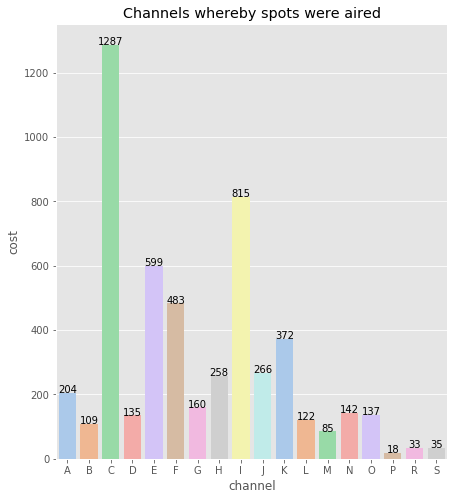

In [47]:
chart_n('channel','Channels whereby spots were aired',0)

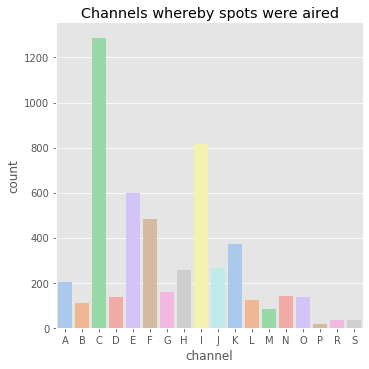

In [48]:
# The channels that spots were aired
chart("channel","Channels whereby spots were aired",0)

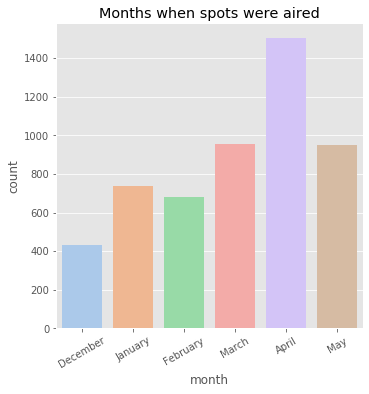

In [49]:
chart("month","Months when spots were aired",30)

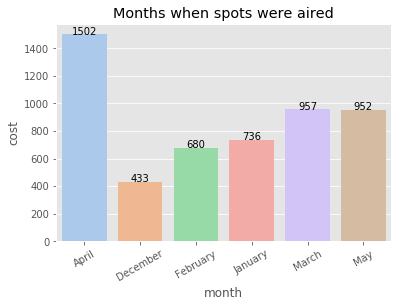

In [50]:
# The months that spots were aired
chart_n_t("month","Months when spots were aired",30)

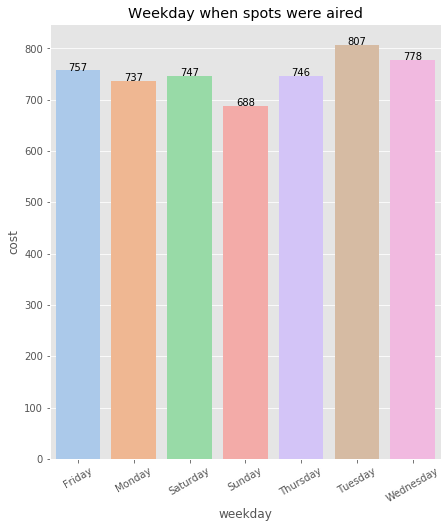

In [51]:
# The weekday that spots were aired
chart_n("weekday","Weekday when spots were aired",30)

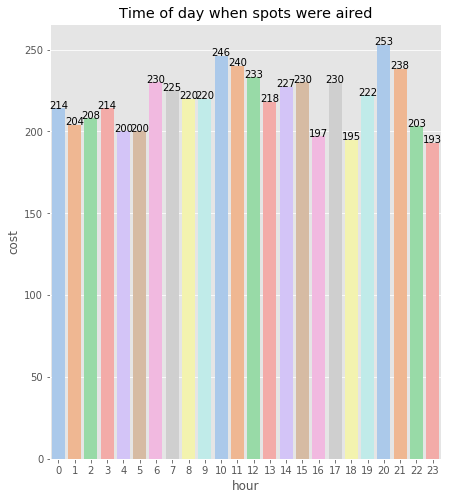

In [52]:
# The time of day that spots were aired
chart_n("hour","Time of day when spots were aired",0)


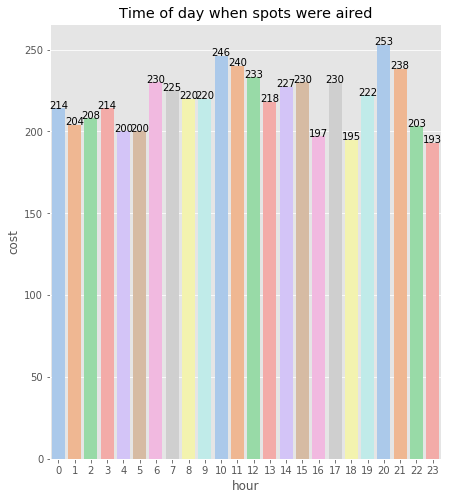

In [53]:
# The time of day that spots were aired
chart_n("hour","Time of day when spots were aired",0)


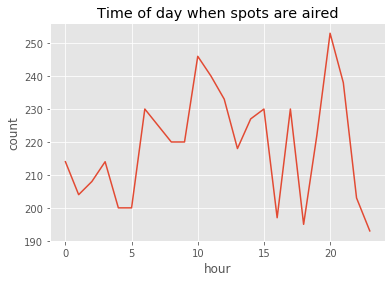

In [54]:
h_c = tv_spot_data.groupby("hour").count()

y=h_c['row']
x=h_c.index.astype(int)
ax = sns.lineplot(x=x, y=y, data=tv_spot_data, palette="pastel")
plt.title ('Time of day when spots are aired')
ax.set(xlabel='hour', ylabel='count')
ax.figure.savefig("output.png")

In [55]:
# Task 3 Section 3 the performance regarding VPMC and CPV
# Def functions, whereby charts would be drawn, equips me to analyze the data

# Question 2
def chart2(a,b,c,f):
    d = sns.catplot(x=a,y=b,kind="bar",palette="pastel",
                    ci=None,data=tv_spot_data, height=5)
    plt.title (c)
    d.set_xticklabels(rotation=f)
    d.savefig(str(d)+".png")
    return(e)

def chart2c(a,b,c,f):
    d = sns.catplot(x=a,y=b,kind="bar",palette="pastel",
                    data=CPV_clear, ci=None, height=5)
    plt.title (c)
    d.set_xticklabels(rotation=f)
    d.savefig(str(d)+".png")
    return(e)

def chart2_n(a, b, c):
    
    gp = tv_spot_data.groupby(a).mean()
    gp = gp.reset_index()
    g = sns.barplot(x=a,y='VPMC',data=gp, palette="pastel")
    for index, row in gp.iterrows():
        g.axes.text(row.name,row['VPMC'], round(row['VPMC'],4)
                    , color='black', ha="center")
    plt.title (b)
    for item in g.get_xticklabels():
        item.set_rotation(c)
    g.figure.savefig(str(g)+".png")
    return(g)

def chart2c_n(a, b, c):
    
    gp = CPV_clear.groupby(a).mean()
    gp = gp.reset_index()
    g = sns.barplot(x=a,y='CPV',data=gp,palette="pastel")
    for index, row in gp.iterrows():
        g.axes.text(row.name,row['CPV'], round(row['CPV'],2), 
                    color='black'
                    , ha="center")
    plt.title (b)
    for item in g.get_xticklabels():
        item.set_rotation(c)
    g.figure.savefig(str(g)+".png")
    return(g)

def chart_c(a,b,c,d,e,g):
    h_c = a.groupby(d).mean().sort_values(by=[b],ascending=g)
    x=h_c[b]
    y=h_c.index.astype(object)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(y = y, x = x)
    ax.set_xlabel(xlabel=c, fontsize=16)
    ax.set_ylabel(ylabel=d, fontsize=16)
    ax.set_title(label=e, fontsize=20)
    f = plt.show()
    ax.figure.savefig(str(ax)+".png")
    return(f)

def chart_c_n(a,b,c,d,e,g):
    h_c = a.groupby(d).mean().sort_values(by=[b],ascending=g)
    x = h_c[b]
    y = h_c.index.astype(object)
    f, ax = plt.subplots(figsize=(12, 8))
    
    ax = sns.barplot(y = y, x = x)
    ax.set_xlabel(xlabel=c, fontsize=16)
    ax.set_ylabel(ylabel=d, fontsize=16)
    ax.set_title(label=e, fontsize=20)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width -1.5  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:1.2f}'.format(width),
            ha="center")
   
    h = plt.show()
    ax.figure.savefig(str(ax)+".png")
    return(h)

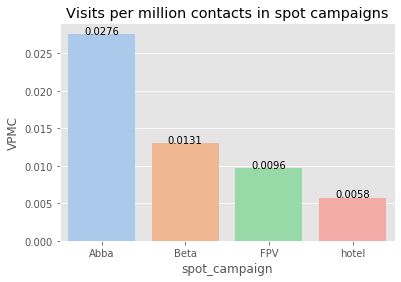

In [56]:
chart2_n("spot_campaign","Visits per million contacts in spot campaigns",0)

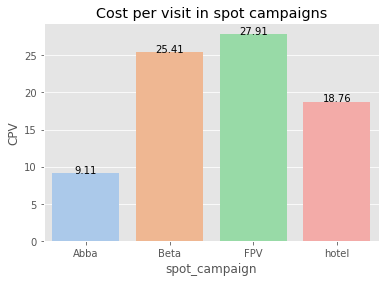

In [57]:
chart2c_n("spot_campaign","Cost per visit in spot campaigns",0)

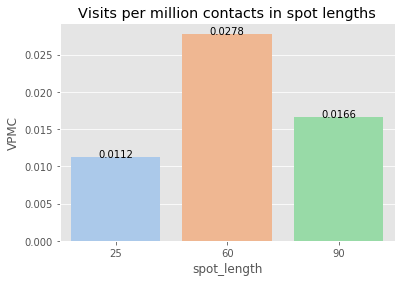

In [58]:
chart2_n("spot_length","Visits per million contacts in spot lengths",0)

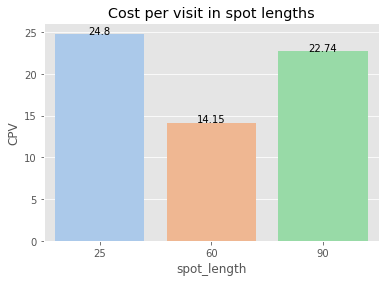

In [59]:
chart2c_n("spot_length","Cost per visit in spot lengths",0)

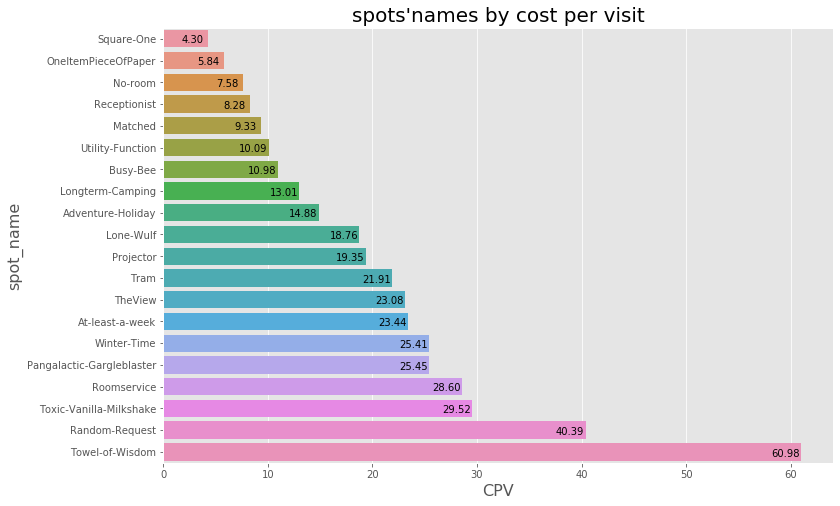

In [60]:
chart_c_n(CPV_clear,"CPV","CPV","spot_name",
          "spots'names by cost per visit",True)

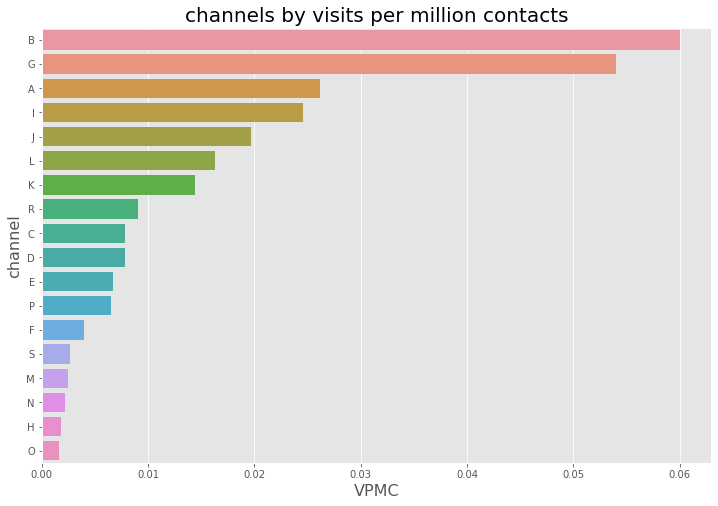

In [61]:
# Question 3

#Which Channels perform best
chart_c(tv_spot_data,"VPMC","VPMC","channel","channels by visits per million contacts",False)

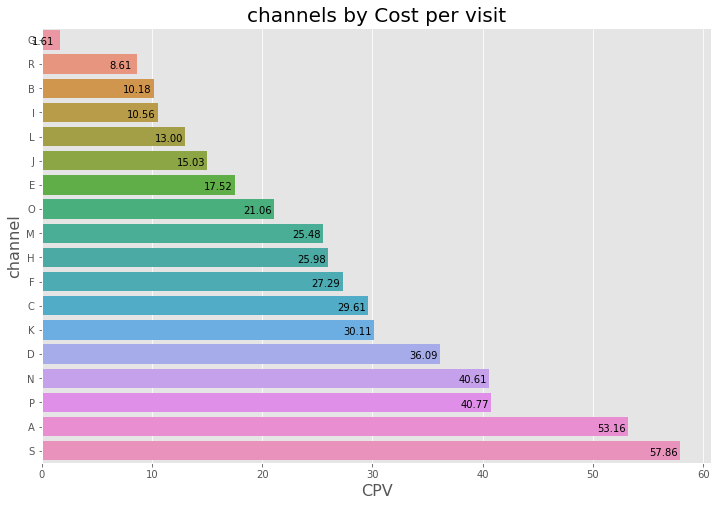

In [62]:
chart_c_n(CPV_clear,"CPV","CPV","channel","channels by Cost per visit",True)

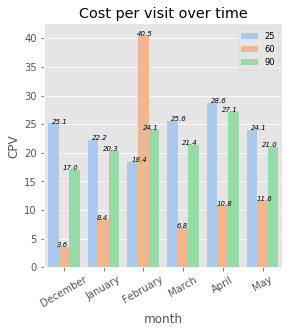

In [63]:
# To dig deeply

plot = sns.catplot(x="month",y="CPV",hue="spot_length"
                         ,kind="bar", palette="pastel",
                         ci=None,data=CPV_clear, legend=False,height=5)
plot.fig.set_size_inches(4,5)
plot.fig.subplots_adjust(top=0.8,right=0.96)


val= CPV_clear.groupby(['spot_length','month']
                      ).mean().reset_index(level='spot_length',
                                           col_level=1).reset_index()

m = {'January':1, 'February':2,'March':3,'April':4,'May':5,'December':0,
      }
val['month_n']=val['month'].map(m)
val=val.sort_values(by=['month_n','spot_length'])
vals = val['CPV'].values
for i in range(0,val['month_n'].nunique()):
    for j in range(0,val['spot_length'].nunique()):
        x = i-0.3+j*0.14
        plot.ax.text(x,vals[i*3+j],vals[i*3+j].round(1),fontsize=7,style='italic')
plt.legend(loc='upper right', fontsize='small')
plot.set_xticklabels(rotation=30)
plt.title ('Cost per visit over time')
plot.savefig("sns_plot20.pdf")


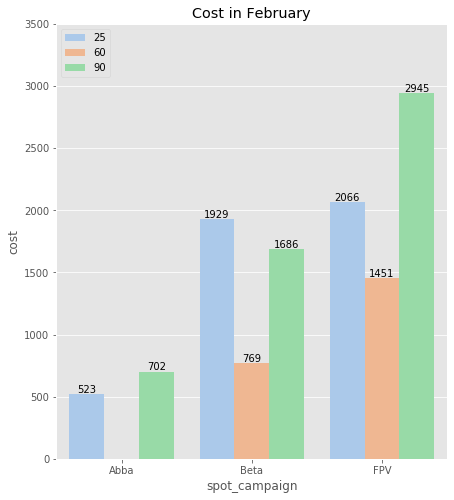

In [64]:
fb = CPV_clear.loc[CPV_clear['month']=='February']

gp = fb.groupby(['spot_campaign','spot_length']
               ).mean().reset_index(level='spot_campaign',col_level=1).reset_index()
fig, ax = plt.subplots()

ax = sns.barplot(x='spot_campaign',y='cost', 
                 hue = 'spot_length',data=gp, palette="pastel")
ax.set_ylim(0, 3500)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-125),
                ha='center', va='center', rotation=0, xytext=(0, 20), 
                textcoords='offset points')  #vertical bars

plt.title ("Cost in February")
plt.legend(loc='upper left')
fig.set_size_inches(7, 8)
fig.savefig("Cost per visits in Febuary"+".png")

In [65]:
def c_c(mon,title,name):
    
    fb = CPV_clear.loc[CPV_clear['month']==mon]

    gp = fb.groupby(['spot_campaign','spot_length']
               ).mean().reset_index(level='spot_campaign',col_level=1).reset_index()
    fig, ax = plt.subplots()

    ax = sns.barplot(x='spot_campaign',y='CPV', 
                     hue = 'spot_length',data=gp, palette="pastel")
    ax.set_ylim(0, 50)
    for p in ax.patches:
        ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-2),
                    ha='center', va='center', rotation=0, xytext=(0, 20), 
                    textcoords='offset points')  #vertical bars

    plt.title (title)
    plt.legend(loc='upper left')
    fig.set_size_inches(7, 8)
    fig.savefig(name+".png")
    return()


()

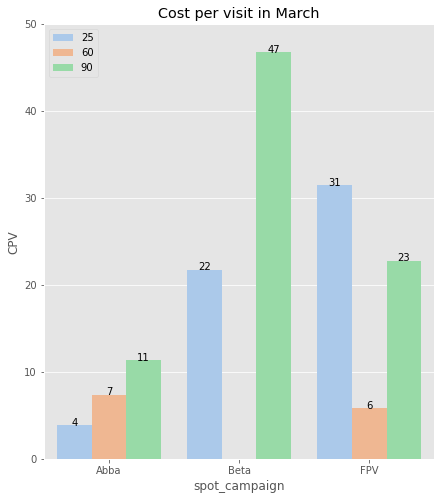

In [66]:
c_c('March','Cost per visit in March','march')

()

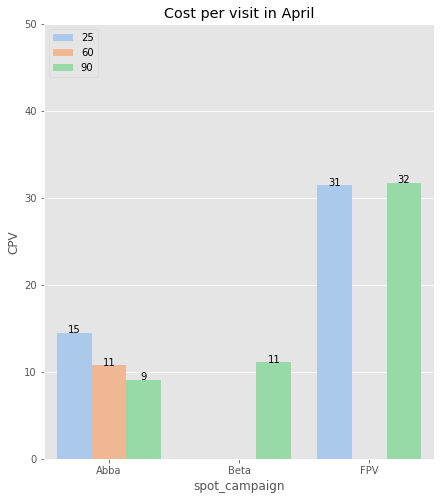

In [67]:
c_c('April','Cost per visit in April','april')

()

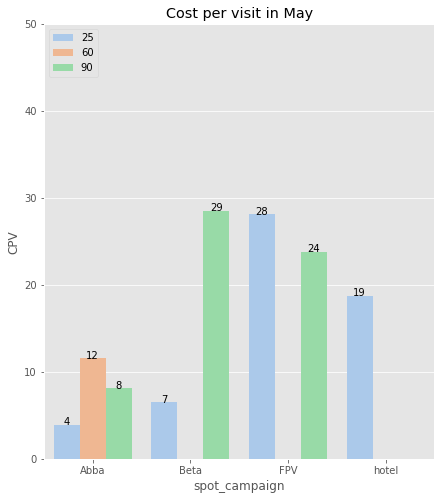

In [68]:
c_c('May','Cost per visit in May','may')

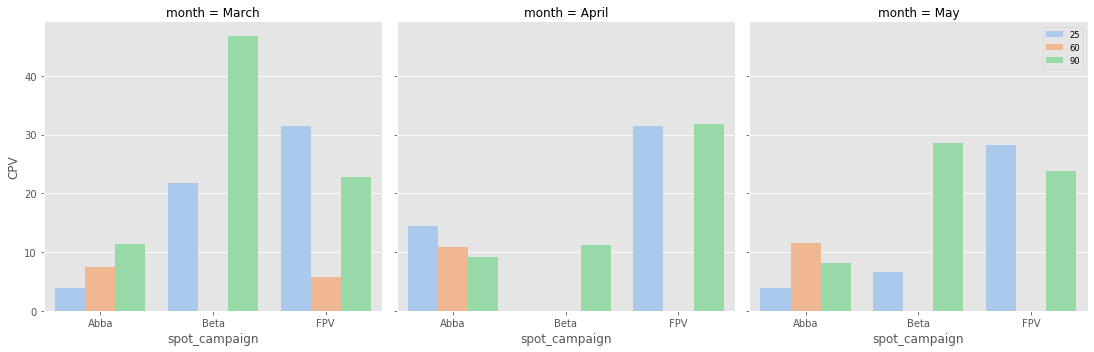

In [69]:
tm = CPV_clear.loc[CPV_clear['month'] =='March']
am = CPV_clear.loc[CPV_clear['month'] =='April']
mm = CPV_clear.loc[CPV_clear['month'] =='May']

m = pd.concat([tm,am,mm])


sns_plot22 = sns.catplot(x="spot_campaign",y="CPV",hue="spot_length",col="month"
                         ,kind="bar", palette="pastel",
                         ci=None,data=m, col_wrap= 6, order=['Abba','Beta','FPV'], legend=False,height=5)
plt.legend(loc='upper right', fontsize='small')

sns_plot22.savefig("sns_plot22.png")

In [70]:
def rs(yaxis,lim,dist,title,file_name):
    so = CPV_clear.loc[tv_spot_data['spot_name']=='Square-One']
    re = CPV_clear.loc[tv_spot_data['spot_name']=='Receptionist']
    combin = pd.concat([re,so])

    gp = combin.groupby(['spot_name','month']
                   ).mean().reset_index(level='spot_name',col_level=1).reset_index()

    m = {'January':1, 'February':2,'March':3,'April':4,'May':5,'December':0,
          }
    gp['month_n']=gp['month'].map(m)
    gp = gp.sort_values(by=['month_n','spot_name'])

    fig, ax = plt.subplots()

    ax = sns.barplot(x='month',y=yaxis, 
                     hue = 'spot_name',data=gp, palette="pastel")
    ax.set_ylim(0, lim)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()- dist),
                    ha='center', va='center', rotation=0, xytext=(0, 20), 
                    textcoords='offset points')  #vertical bars

    plt.title (title)
    plt.legend(loc='upper right')
    fig.set_size_inches(7, 8)
    fig.savefig(file_name+".png") 
    return()

()

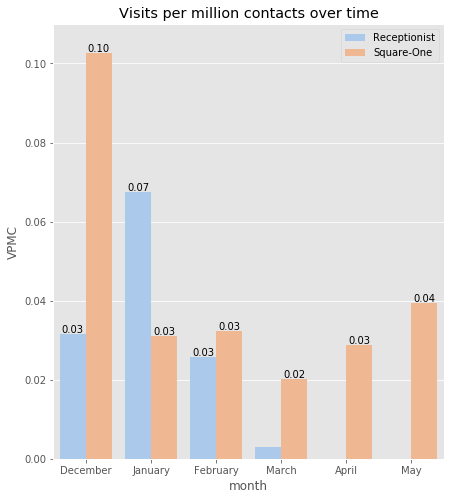

In [71]:
rs('VPMC', 0.11, 0.004,'Visits per million contacts over time','visit')

()

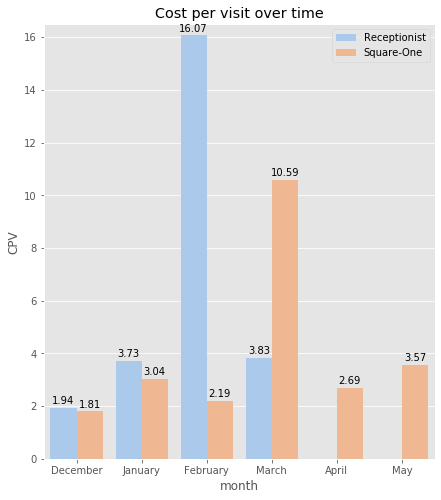

In [72]:
rs('CPV', 16.5, 0.5, 'Cost per visit over time','CPV')

()

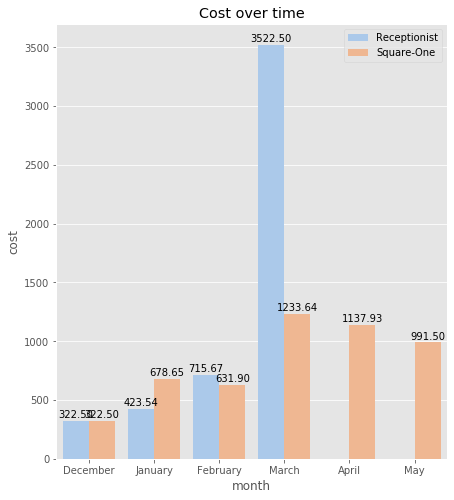

In [73]:
rs('cost', 3700, 120, 'Cost over time','cost_rs')

In [74]:
def bg(yaxis,lim,dist,title,file_name):
    b = CPV_clear.loc[tv_spot_data['channel']=='B']
    g = CPV_clear.loc[tv_spot_data['channel']=='G']
    combin = pd.concat([b,g])
    gp = combin.groupby(['channel','month']
                   ).mean().reset_index(level='channel',col_level=1).reset_index()

    m = {'January':1, 'February':2,'March':3,'April':4,'May':5,'December':0,
          }
    gp['month_n']=gp['month'].map(m)
    gp = gp.sort_values(by=['month_n','channel'])

    fig, ax = plt.subplots()

    ax = sns.barplot(x='month',y=yaxis, 
                     hue = 'channel',data=gp, palette="pastel")
    ax.set_ylim(0, lim)
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()- dist),
                    ha='center', va='center', rotation=0, xytext=(0, 20), 
                    textcoords='offset points')  #vertical bars

    plt.title (title)
    plt.legend(loc='upper left')
    fig.set_size_inches(7, 8)
    fig.savefig(file_name+".png")
    return()

()

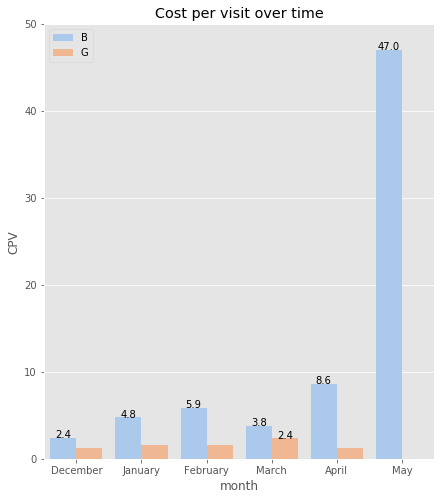

In [75]:
bg('CPV', 50, 2, 'Cost per visit over time', 'BG_CPV')

()

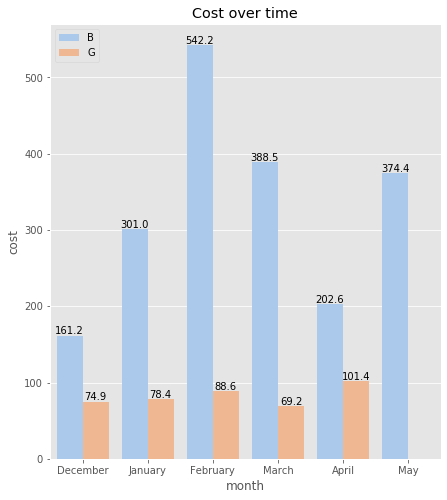

In [76]:
bg('cost', 570, 20, 'Cost over time', 'BG_cost')

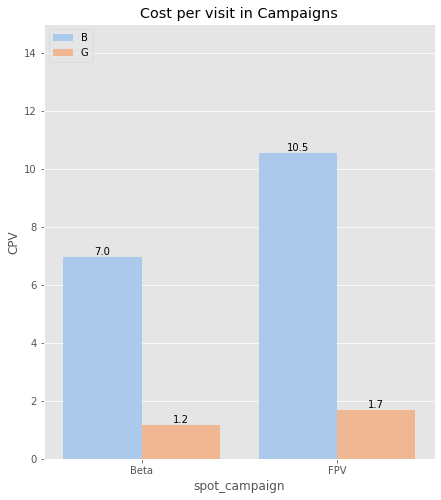

In [77]:

b = CPV_clear.loc[tv_spot_data['channel']=='B']
g = CPV_clear.loc[tv_spot_data['channel']=='G']
combin = pd.concat([b,g])
gp = combin.groupby(['channel','spot_campaign']
                   ).mean().reset_index(level='channel',col_level=1).reset_index()

gp = gp.sort_values(by=['spot_campaign','channel'])
fig, ax = plt.subplots()
ax = sns.barplot(x='spot_campaign',y='CPV', 
                 hue = 'channel',data=gp, palette="pastel")
ax.set_ylim(0, 15)
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., 
                                          p.get_height()- 0.5),
                ha='center', va='center', rotation=0, xytext=(0, 20), 
                textcoords='offset points')  #vertical bars

plt.title ('Cost per visit in Campaigns')
plt.legend(loc='upper left')
fig.set_size_inches(7, 8)
fig.savefig('bg_campaign'+".png")


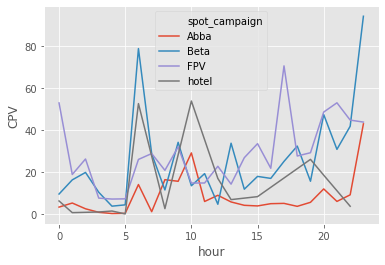

In [78]:
def chart_hour(b):
    h_c = CPV_clear.groupby(["hour",b]).mean()
    h_c.reset_index(level=b, col_level=1)
    h_c = h_c.reset_index()
    y=h_c['CPV']
    ax = sns.lineplot(x="hour", y=y, hue=b, ci=None, data=h_c)
    return(ax)


chart_hour("spot_campaign")


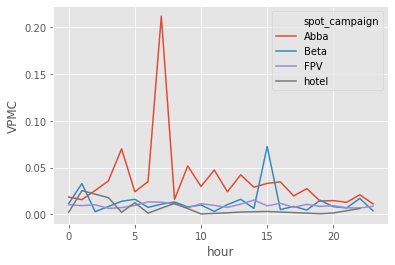

In [79]:
h_c = CPV_clear.groupby(["hour",'spot_campaign']).mean()
h_c.reset_index(level='spot_campaign', col_level=1)
h_c = h_c.reset_index()
y=h_c['VPMC']
ax = sns.lineplot(x="hour", y=y, hue='spot_campaign', ci=None, data=h_c)


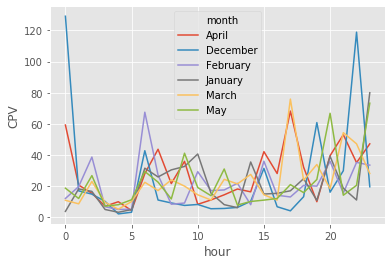

In [80]:
chart_hour("month")

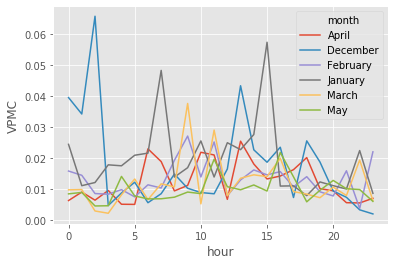

In [81]:
h_c = tv_spot_data.groupby(["hour","month"]).mean()

h_c.reset_index(level='month', col_level=1)
h_c = h_c.reset_index()
y=h_c['VPMC']

ax = sns.lineplot(x="hour", y=y, hue="month", ci=None, data=h_c)

/Users/Mac/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:34: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


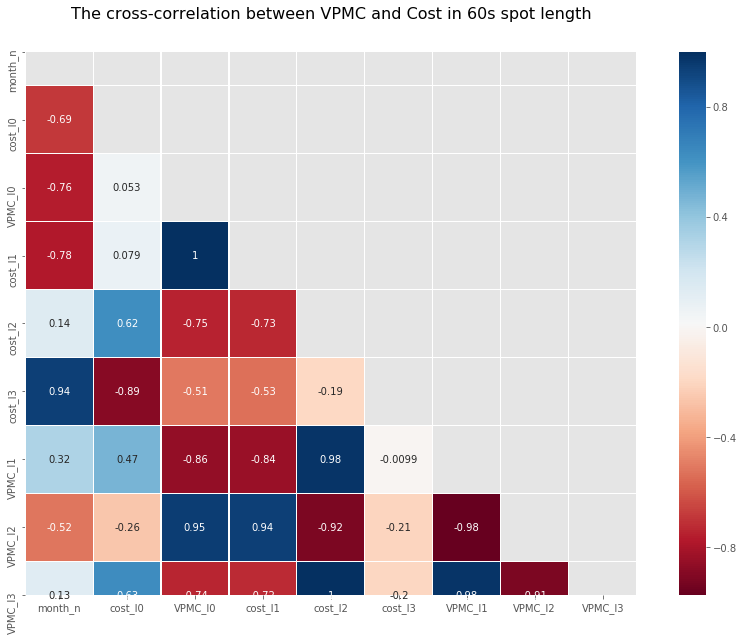

In [82]:
# Create a heat map chart in order to reveal correlation. source from internet

sub = CPV_clear.loc[CPV_clear['spot_length']=='60']
gp = sub.groupby(['month']).mean().reset_index()

m = {'January':1, 'February':2,'March':3,'April':4,'May':5,'December':0}
gp['month_n']=gp['month'].map(m)
gp = gp.sort_values(by=['month_n'])
gp

g=['month_n','cost','VPMC']

x = gp[g]

def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df
NON_DER = ['month_n',]
df_new = df_derived_by_shift(x, 3, NON_DER)
df_new = df_new.dropna()
w = df_new.corr()
w = w.rename(index=str, columns = {'month_n':'month_n','cost':'cost_l0',
                                  'VPMC':'VPMC_l0','cost_1':'cost_l1','cost_2':'cost_l2',
                                  'cost_3':'cost_l3','VPMC_1':'VPMC_l1','VPMC_2':'VPMC_l2',
                                  'VPMC_3':'VPMC_l3'})
w = w.rename({'month_n':'month_n','cost':'cost_l0','VPMC':'VPMC_l0',
              'cost_1':'cost_l1','cost_2':'cost_l2','cost_3':'cost_l3',
              'VPMC_1':'VPMC_l1','VPMC_2':'VPMC_l2','VPMC_3':'VPMC_l3'}, axis = 'index')
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title('The cross-correlation between VPMC and Cost in 60s spot length', y=1.05, size=16)

mask = np.zeros_like(w)
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(w, mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('heat_length60.png')

/Users/Mac/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:32: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.


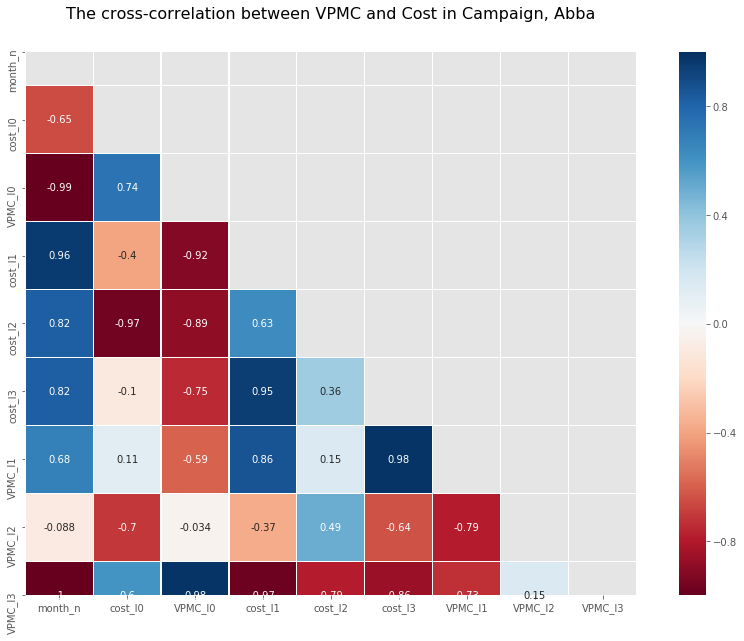

In [83]:
sub = CPV_clear.loc[CPV_clear['spot_campaign']=='Abba']
gp = sub.groupby(['month']).mean().reset_index()

m = {'January':1, 'February':2,'March':3,'April':4,'May':5,'December':0}
gp['month_n']=gp['month'].map(m)
gp = gp.sort_values(by=['month_n'])
gp

g=['month_n','cost','VPMC']

x = gp[g]

def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df
NON_DER = ['month_n',]
df_new = df_derived_by_shift(x, 3, NON_DER)
df_new = df_new.dropna()
w = df_new.corr()
w = w.rename(index=str, columns = {'month_n':'month_n','cost':'cost_l0',
                                  'VPMC':'VPMC_l0','cost_1':'cost_l1','cost_2':'cost_l2',
                                  'cost_3':'cost_l3','VPMC_1':'VPMC_l1','VPMC_2':'VPMC_l2',
                                  'VPMC_3':'VPMC_l3'})
w = w.rename({'month_n':'month_n','cost':'cost_l0','VPMC':'VPMC_l0',
              'cost_1':'cost_l1','cost_2':'cost_l2','cost_3':'cost_l3',
              'VPMC_1':'VPMC_l1','VPMC_2':'VPMC_l2','VPMC_3':'VPMC_l3'}, axis = 'index')
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title('The cross-correlation between VPMC and Cost in Campaign, Abba', y=1.05, size=16)

mask = np.zeros_like(w)
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(w, mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.savefig('heat_Campaign_Abba.png')